In [1]:
import pandas as pd

In [2]:
data= pd.read_csv("IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
print("Number of rows :",data.shape[0])
print("Number od columns:", data.shape[1])

Number of rows : 50000
Number od columns: 2


In [4]:
data.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [5]:
text=data['review'][1]

In [6]:
from bs4 import BeautifulSoup
ct=BeautifulSoup(text, "lxml").text
ct

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [7]:
import re
ct=re.sub(r'[^\w\s]','',ct)
ct

'A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors are extremely well chosen Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great masters of comedy and his life The realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwells murals decorating every surface are terribly well done'

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejaswani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
stopword= set(stopwords.words('english'))
tokens=ct.lower().split()
token_list=[]
for token in tokens:
    if token not in stopword:
        token_list.append(token)
        
token_list

['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'oldtimebbc',
 'fashion',
 'gives',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actors',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voices',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'references',
 'williams',
 'diary',
 'entries',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'masters',
 'comedy',
 'life',
 'realism',
 'really',
 'comes',
 'home',
 'little',
 'things',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'techniques',
 'remains',
 'solid',
 'disappears',
 'plays',
 'knowledge',
 'senses',
 'particularly',
 'scenes',
 'concerning',
 'orton',
 'halliwell',
 'sets',
 'particularly',
 'flat',
 'halliwells',
 'murals',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

In [11]:
from nltk.stem import WordNetLemmatizer

In [12]:
lemmatizer = WordNetLemmatizer()

In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tejaswani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
lemma_word = []
for token in token_list:
    lemma_word.append(lemmatizer.lemmatize(token))
    
lemma_word

['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'oldtimebbc',
 'fashion',
 'give',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actor',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voice',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'reference',
 'williams',
 'diary',
 'entry',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'realism',
 'really',
 'come',
 'home',
 'little',
 'thing',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'technique',
 'remains',
 'solid',
 'disappears',
 'play',
 'knowledge',
 'sens',
 'particularly',
 'scene',
 'concerning',
 'orton',
 'halliwell',
 'set',
 'particularly',
 'flat',
 'halliwells',
 'mural',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

In [15]:
join_text = ' '.join(lemma_word)
join_text

'wonderful little production filming technique unassuming oldtimebbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwells mural decorating every surface terribly well done'

In [16]:
from tqdm import tqdm
def data_cleaner(data):
    clean_data = []
    for sentence in tqdm(data):
        cleantext = BeautifulSoup(sentence, "lxml").text #html tags
        cleantext = re.sub(r'[^\w\s]','',cleantext) #punctuation
        cleantext = [token for token in cleantext.lower().split() if token not in stopword]  #stopword
        clean_text = ' '.join([lemmatizer.lemmatize(token) for token in cleantext])
        clean_data.append(clean_text.strip())
    return clean_data

In [17]:
clean_data = data_cleaner(data.review.values)

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:35<00:00, 521.88it/s]


In [18]:
clean_data[2]

'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty character likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody allen still fully control style many u grown lovethis id laughed one woodys comedy year dare say decade ive never impressed scarlet johanson managed tone sexy image jumped right average spirited young womanthis may crown jewel career wittier devil wear prada interesting superman great comedy go see friend'

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data.sentiment, test_size=0.2, random_state= 42,stratify=data["sentiment"])

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [36]:
y_test = le.fit_transform(y_test)
y_test

array([0, 0, 1, ..., 0, 1, 0])

In [37]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(40000, 3) (40000,)
(10000, 3) (10000,)


In [38]:
clean_data_train_data = data_cleaner(X_train.review.values)

100%|███████████████████████████████████████████████████████████████████████████| 40000/40000 [01:15<00:00, 532.07it/s]


In [39]:
X_train = X_train.reset_index(drop=True)
X_train['cleaned_text'] = clean_data_train_data
X_train.head()

,review,sentiment,cleaned_text
0,I caught this little gem totally by accident b...,positive,caught little gem totally accident back 1980 8...
1,I can't believe that I let myself into this mo...,negative,cant believe let movie accomplish favor friend...
2,*spoiler alert!* it just gets to me the nerve ...,negative,spoiler alert get nerve people remake use term...
3,If there's one thing I've learnt from watching...,negative,there one thing ive learnt watching george rom...
4,"I remember when this was in theaters, reviews ...",negative,remember theater review said horrible well did...


In [40]:
clean_data_test_data = data_cleaner(X_test.review.values)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:18<00:00, 536.01it/s]


In [41]:
X_test = X_test.reset_index(drop=True)
X_test['cleaned_text'] = clean_data_test_data
X_test.head()

,review,sentiment,cleaned_text
0,"Yes, MTV there really is a way to market Daria...",negative,yes mtv really way market daria started clever...
1,The story of the bride fair is an amusing and ...,negative,story bride fair amusing engaging one filmmake...
2,"A team varied between Scully and Mulder, two o...",positive,team varied scully mulder two scientist pilot ...
3,This was a popular movie probably because of t...,negative,popular movie probably humor fastmoving story ...
4,This movie made me so angry!! Here I am thinki...,negative,movie made angry thinking here new horror movi...


In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
vec = CountVectorizer()
vec = vec.fit(X_train.cleaned_text)
train_x_bow = vec.transform(X_train.cleaned_text)
test_x_bow = vec.transform(X_test.cleaned_text)

In [44]:
print(train_x_bow.shape)
print(test_x_bow.shape)

(40000, 181688)
(10000, 181688)


In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [46]:
classifier = MultinomialNB()

In [47]:
alpha_ranges = {"alpha":[10**-2,10**-1,10**0,10**1,10**2]}
grid_search =GridSearchCV(classifier , param_grid = alpha_ranges ,scoring = "accuracy",cv=3,return_train_score = True)
grid_search.fit(train_x_bow,y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='accuracy')

In [48]:
alpha = [10**-2,10**-1,10**0,10**1,10**2]
train_acc = grid_search.cv_results_['mean_train_score']
train_std = grid_search.cv_results_['std_train_score']
test_acc = grid_search.cv_results_['mean_test_score']
test_std = grid_search.cv_results_['std_test_score']

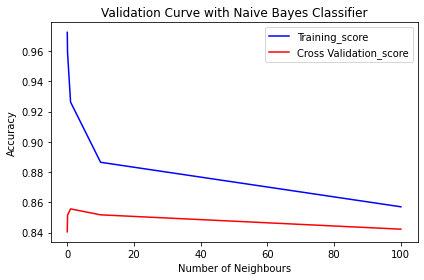

In [49]:
import matplotlib.pyplot as plt

plt.plot(alpha, train_acc, label = "Training_score", color='b')
plt.plot(alpha, test_acc, label = "Cross Validation_score", color='r')

plt.title("Validation Curve with Naive Bayes Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [50]:
grid_search.best_estimator_

MultinomialNB(alpha=1)

In [51]:
classifier = MultinomialNB(alpha=1)
classifier.fit(train_x_bow,y_train)

MultinomialNB(alpha=1)

In [52]:
predict = classifier.predict(test_x_bow)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.859

In [62]:
text = ["the movie was great"]
text_vec = vec.transform(text)
classifier.predict(text_vec)
le.inverse_transform([1])

array(['positive'], dtype=object)

In [66]:
text = ["the movie was bad"]
text_vec = vec.transform(text)
classifier.predict(text_vec)
le.inverse_transform([0])

array(['negative'], dtype=object)

In [67]:
from joblib import dump
dump(vec,"vectors.joblib")
dump(classifier,"model.joblib")

['model.joblib']